## 02. Plot pair trajectories
**20 March 2025 by MiniUFO**

---
[TOC]

---
### 1. Introduction
With a `pairs` dataset extracted from a drifter dataset, we can do some statistics based on the these pairs and plot their initial positions of deployment.  But we also need to plot the full trajectories of selected pairs.  Here we are going to do this.

---

### 2. Calculation
#### 2.1 load the GLAD dataset and get original pairs

In [1]:
import numpy as np
import xarray as xr
import sys
sys.path.append('../../../')
from xdispersion import RelativeDispersion

drifters = xr.open_dataset('../../../data/glad32.nc')

rd = RelativeDispersion(drifters, maxtlen=4*24*85, ragged=True, ID='traj',
                        xpos='longitude', uvel='ve', time='time', Rearth=6371.2,
                        ypos='latitude' , vvel='vn', coord='latlon')

pairs = rd.get_all_pairs()

# filter original pairs from all pairs
condition = np.logical_and(pairs.r0>=0.08, pairs.r0<=0.18)
origin_pairs = pairs.where(condition, drop=True).astype(pairs.dtypes)
origin_pairs

there are 43518 pairs of particles


<xarray.Dataset>
Dimensions:   (pair: 171, particle: 2)
Coordinates:
  * pair      (pair) int32 5716 6266 6539 7083 7883 ... 43389 43396 43425 43463
  * particle  (particle) int32 0 1
Data variables:
    tlen      (pair) int32 3557 3142 3759 1999 3661 ... 2872 1314 4296 8039 3514
    stim      (pair) datetime64[ns] 2012-07-22T12:45:00 ... 2012-07-22T16:30:00
    r0        (pair) float32 0.08872 0.18 0.09602 ... 0.1259 0.09732 0.08311
    pID       (pair, particle) int32 20 21 22 23 23 24 ... 281 282 283 285 286
    xpos0     (pair, particle) float32 -88.2 -88.2 -88.2 ... -88.09 -88.08
    ypos0     (pair, particle) float32 28.8 28.8 28.8 28.8 ... 27.89 28.84 28.84
    idxI      (pair, particle) int32 121691 125248 134108 ... 1556133 1559647
    idxJ      (pair, particle) int32 130550 134107 137250 ... 1559647 1563161

#### 2.2 Get positional variables
To plot the full trajectories of any pairs, one need to load the positional variables into memory.  Note that loading the full data requires **padding with nans** so that the returned variables are not memory efficient.  With selected original pairs, this is not a serious problem.

In [2]:
lons = rd.get_variable(origin_pairs, 'longitude')
lats = rd.get_variable(origin_pairs, 'latitude')
lons

<xarray.DataArray (pair: 171, particle: 2, rtime: 8160)>
array([[[-88.1956  , -88.19457 , -88.19354 , ...,        nan,
                nan,        nan],
        [-88.19522 , -88.19419 , -88.19316 , ...,        nan,
                nan,        nan]],

       [[-88.19959 , -88.19861 , -88.19762 , ...,        nan,
                nan,        nan],
        [-88.20097 , -88.19991 , -88.19887 , ...,        nan,
                nan,        nan]],

       [[-88.20097 , -88.19991 , -88.19887 , ...,        nan,
                nan,        nan],
        [-88.200386, -88.199394, -88.19841 , ...,        nan,
                nan,        nan]],

       ...,

       [[-89.166214, -89.16636 , -89.16659 , ...,        nan,
                nan,        nan],
        [-89.16498 , -89.16493 , -89.16503 , ...,        nan,
                nan,        nan]],

       [[-89.04132 , -89.04524 , -89.04906 , ...,        nan,
                nan,        nan],
        [-89.0412  , -89.04514 , -89.04895 , ...,        nan,
                nan,        nan]],

       [[-88.08504 , -88.084946, -88.08488 , ...,        nan,
                nan,        nan],
        [-88.08461 , -88.08459 , -88.08457 , ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * pair      (pair) int32 5716 6266 6539 7083 7883 ... 43389 43396 43425 43463
  * particle  (particle) int64 0 1
  * rtime     (rtime) float64 0.0 0.01042 0.02083 0.03125 ... 84.97 84.98 84.99

The returned variable is of `['pair', 'particle', 'rtime']` size.  In order to make it continuous in memory, nans are padded.  Hence the subsequence calculation can make use of `xarray`'s functionality.

#### 2.3 Plotting the trajectories of selected pairs

In [3]:
# select positions of a single pair
lons_sel = lons.isel(pair=20)
lats_sel = lats.isel(pair=20)

/home/qianyk/miniconda3/envs/py310/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


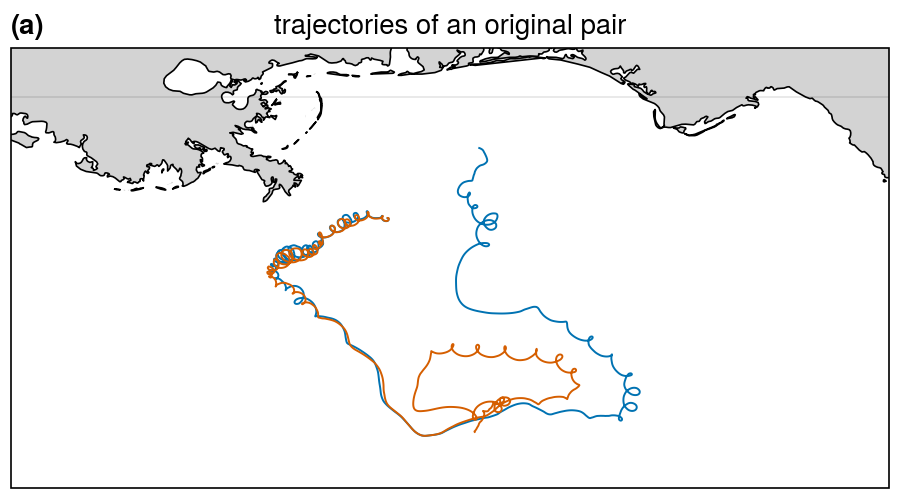

In [4]:
import proplot as pplt

fig, ax = pplt.subplots(figsize=(4.5,2.5), facecolor='w', proj='cyl')
ax.plot(lons_sel.T, lats_sel.T, lw=0.7) # n
ax.set_xlim([-92, -83])
ax.set_ylim([26, 30.5])
ax.set_title('trajectories of an original pair')
ax.format(abc='(a)', land=True, coast=True, reso='hi', landcolor='lightgray')

Now we could select 6 pairs and plot their trajectories

/home/qianyk/miniconda3/envs/py310/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/qianyk/miniconda3/envs/py310/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/qianyk/miniconda3/envs/py310/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/qianyk/miniconda3/envs/py310/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:403: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a G

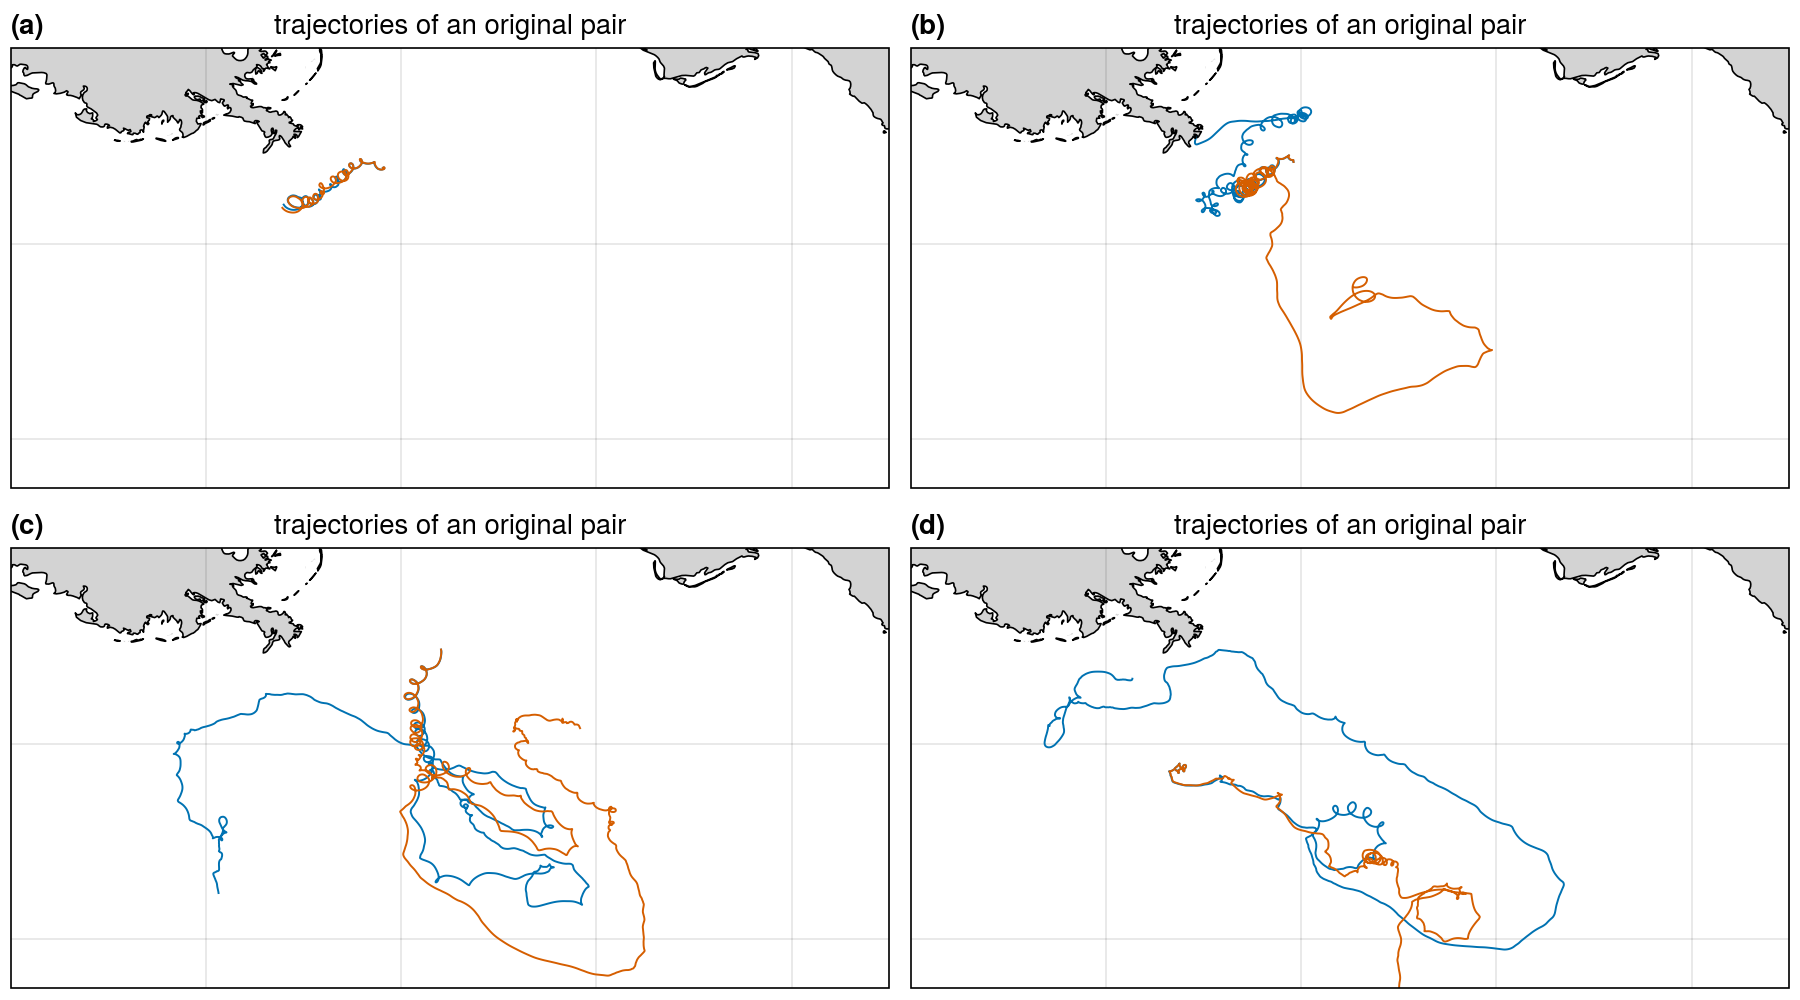

In [5]:
import proplot as pplt

pairIDs = [10, 50, 100, 120]

fig, axes = pplt.subplots(nrows=2, ncols=2, figsize=(9,5), facecolor='w', proj='cyl')

for i, ID in enumerate(pairIDs):
    lons_sel = lons.isel(pair=ID)
    lats_sel = lats.isel(pair=ID)
    ax = axes[i]
    ax.plot(lons_sel.T, lats_sel.T, lw=0.7) # n
    ax.set_xlim([-92, -83])
    ax.set_ylim([25.5, 30])
    ax.set_title('trajectories of an original pair')

axes.format(abc='(a)', land=True, coast=True, reso='hi', landcolor='lightgray', lonlines=2, latlines=2)

### 3. Conclusions

The loading of full data into memory is necessary for plotting the trajectories.  But it is less memory efficient as there could be a lot of nans in the returned variables.  For original pairs which are less than 200, this is not a problem.